In [48]:
import os,io,re
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
import csv
import itertools as it 
import glob
import pandas as pd 
from scipy import interpolate
import time

#combine all csv files in the csv folder
	
BASE = "/Users/radhikanikam/Downloads/Traffic_Data"
global PATH
PATH = "/Day3/CSV/"


In [49]:
def get_daily(PATH,axis):
    #ax  =axis
	ax= axis
	folder = BASE+PATH
	os.chdir(folder)
	files = glob.glob('*.csv')
	f = {}
	data = pd.DataFrame()
	header_saved = False
	#with open('output.csv','w') as fout:
	data = pd.read_csv(files[0])
	data = data[['LinkID','RoadName']].reset_index(drop = True)
	print(len(files))
	for i in range(len(files)):
		res = re.findall("\d+", files[i])
		f[i] = pd.read_csv(files[i])
		f[i][['Speed' + str(res)]] = f[i][['Speed']]
		f[i] = f[i][['LinkID','Speed'+str(res)]].reset_index(drop = True)
		data = pd.merge(data,f[i],on = 'LinkID', how = 'outer', left_index = True)	
		#data[['Speed' + str(i)]] =(f[i][['Speed' + str(i)]])		
	#print(data.head())
	fill_value = pd.DataFrame({col: data.mean(axis=1) for col in data.columns})
	#data.fillna(fill_value) 
	#data = data.fillna(data.mean(axis=0))
	#data.to_csv('Day_stats.csv')
	#g = sns.FacetGrid(data, row = data.loc[data['RoadName'] == 'SANDY LANE'])
	#g = g.map(plt.hist,)
	data.drop(['LinkID'], inplace = True)
	
	
	labels = data.columns[2:]
	x = data.as_matrix()
	road1 = 'SOUTH BRIDGE ROAD'
	road2 = 'PECK SEAH STREET'
	road3 = 'ALEXANDRA ROAD'
	xes = np.array((data[data['RoadName'] == road1].as_matrix()[0,2:]).tolist())
	xis = np.array((data[data['RoadName'] == road2].as_matrix()[0,2:]).tolist())
	xas = np.array((data[data['RoadName'] == road3].as_matrix()[0,2:]).tolist())
	call =np.array([i for i in range(len(xes))])
	#print(xes)
	# xe = np.arange(0,75)
	s1mask = np.isfinite(xes)
	s2mask = np.isfinite(xis)
	s3mask = np.isfinite(xas)

	# f = interpolate.interp1d(call,xes, kind = 'linear') #,fill_value ="extrapolation")
	# plt.plot(call,xes,'o', f(xe),'-')
	# plt.xticks(call,labels, rotation = '90')
	# #data[data['RoadName'] == 'SANDY LANE'].plot.bar()

	# from scipy.interpolate import spline

	# xnew = np.linspace(call[0],call[len(call) -1],len(call)) #300 represents number of points to make between T.min and T.max

	#f= interpolate.interp1d(call,xes) #,fill_value ="extrapolation")
	
	ax.plot(call[s1mask],xes[s1mask],marker = 'o',linestyle = '-', label = road1)
	ax.plot(call[s2mask],xis[s2mask],marker = 'o',linestyle = '-', label = road2)
	ax.plot(call[s3mask],xas[s3mask],marker = 'o',linestyle = '-', label = road3)
	plt.xticks(call,labels, rotation = '90')
	ax.legend(loc = 'best')
	#plt.savefig(str(axis) +'.png')
	
    

74
4.909227132797241
62


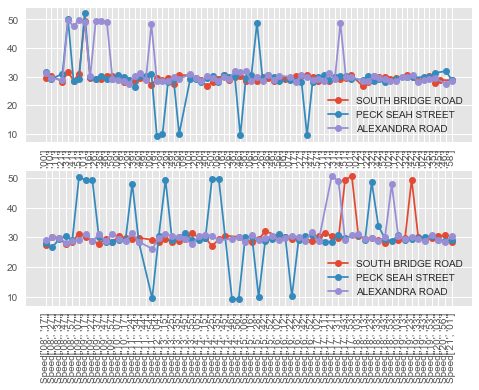

In [50]:
if __name__ == "__main__":
	fig = plt.figure()
	ax1 = fig.add_subplot(211)
	t1 = time.time()
	get_daily(PATH,ax1)
	t2 = time.time()
	print(t2-t1)
	
	PATH ="/Day4/CSV/"
	ax2 = fig.add_subplot(212)
	get_daily(PATH,ax2)
	plt.show()